In [1]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd

In [2]:
! pwd
expr_df = pd.read_csv("../metadata/length_and_depth.csv")
expr_df = expr_df.drop("nvar", axis=1)
expr_df = expr_df.rename(columns={
    "length" : "expr_length",
    "depth" : "expr_depth"
})
expr_df

/Users/felixgao/Desktop/Year3/STA378/OptimizationParameterTuning/Julia Notebook/src


,problem,objtype,variable_nvar,expr_length,expr_depth
0,NZF1,least_squares,True,250,8
1,arglina,least_squares,True,10404,9
2,arglinb,least_squares,True,40200,8
3,arglinc,other,True,39204,7
4,argtrig,other,True,497,7
...,...,...,...,...,...
100,tridia,other,True,398,6
101,vardim,other,True,798,6
102,vibrbeam,least_squares,False,481,13
103,watson,least_squares,False,3900,12


In [3]:
complete_df = pd.read_csv("../results/complete_dataset_as_of_nov6.csv")
complete_df = complete_df[complete_df["is_init_run"] == 0]
complete_df = complete_df.rename(columns={"name" : "problem"})
df = complete_df.merge(
    expr_df,
    on = 'problem',
    how = "inner"
)
df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,neval_grad,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,315,0.000031,0.001440,5,False,False,least_squares,True,250,8
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,216,0.000019,0.001440,5,False,False,least_squares,True,250,8
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,228,0.000016,0.001440,5,False,False,least_squares,True,250,8
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,203,0.000017,0.001440,5,False,False,least_squares,True,250,8
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,225,0.000017,0.001440,5,False,False,least_squares,True,250,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,first_order,woods,LBFGSSolver,96,1000,1.482090,3.197624,64,64,84,...,75,0.001356,0.008664,5,False,True,other,True,425,7
18822,first_order,woods,LBFGSSolver,97,1000,1.481800,3.229800,64,64,84,...,75,0.001373,0.008664,5,False,True,other,True,425,7
18823,first_order,woods,LBFGSSolver,98,1000,1.482000,3.261976,64,64,84,...,75,0.001367,0.008664,5,False,True,other,True,425,7
18824,first_order,woods,LBFGSSolver,99,1000,1.481908,3.294152,64,64,84,...,75,0.001358,0.008664,5,False,True,other,True,425,7


In [4]:
group_cols = ["problem", "nvar"]

d = df[df["time"].notna()].copy()
d = d.sort_values(group_cols + ["time", "mem"], ascending=True)

best_idx = d.groupby(group_cols)["time"].idxmin()
best_mem_df = d.loc[best_idx].reset_index(drop=True)
best_mem_df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,neval_grad,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth
0,first_order,NZF1,LBFGSSolver,64,91,1.405412,0.241360,59,59,70,...,64,0.000017,0.001440,5,False,False,least_squares,True,250,8
1,first_order,NZF1,LBFGSSolver,72,988,3.127719,2.406504,81,81,94,...,86,0.001715,0.008600,5,False,True,least_squares,True,250,8
2,first_order,arglina,LBFGSSolver,4,100,0.004524,0.029440,1,1,3,...,3,0.000059,0.001520,5,False,False,least_squares,True,10404,9
3,first_order,arglina,LBFGSSolver,5,1000,1.400665,0.240920,1,1,3,...,3,0.005946,0.008664,5,False,True,least_squares,True,10404,9
4,first_order,arglinb,LBFGSSolver,1,100,1.422291,0.020488,2,2,29,...,5,0.000051,0.001520,5,False,False,least_squares,True,40200,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,first_order,vardim,LBFGSSolver,21,1000,28.733923,1.509576,1165,1165,6897,...,6873,0.004314,0.008664,5,False,True,other,True,798,6
180,first_order,vibrbeam,LBFGSSolver,11,8,0.578265,0.054456,103,103,179,...,126,0.000006,0.000720,5,False,False,least_squares,False,481,13
181,unbounded,watson,LBFGSSolver,51,31,1.019050,32.288992,1,1,8,...,8,0.001956,4.349024,42554,False,False,least_squares,False,3900,12
182,first_order,woods,LBFGSSolver,8,100,1.288446,0.060864,45,45,69,...,60,0.000016,0.001520,5,False,False,other,True,425,7


In [5]:
best_mem_map = d.loc[best_idx].set_index(group_cols)["mem"]

df = df.copy()
df["best_problem_mem"] = df.set_index(group_cols).index.map(best_mem_map)
df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth,best_problem_mem
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,0.000031,0.001440,5,False,False,least_squares,True,250,8,64
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,0.000019,0.001440,5,False,False,least_squares,True,250,8,64
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,0.000016,0.001440,5,False,False,least_squares,True,250,8,64
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,first_order,woods,LBFGSSolver,96,1000,1.482090,3.197624,64,64,84,...,0.001356,0.008664,5,False,True,other,True,425,7,8
18822,first_order,woods,LBFGSSolver,97,1000,1.481800,3.229800,64,64,84,...,0.001373,0.008664,5,False,True,other,True,425,7,8
18823,first_order,woods,LBFGSSolver,98,1000,1.482000,3.261976,64,64,84,...,0.001367,0.008664,5,False,True,other,True,425,7,8
18824,first_order,woods,LBFGSSolver,99,1000,1.481908,3.294152,64,64,84,...,0.001358,0.008664,5,False,True,other,True,425,7,8


In [108]:
# unique instances: one row per (problem, nvar)
instances = df[["problem", "nvar"]].drop_duplicates()

# shuffle instances
instances = instances.sample(frac=1, random_state=66).reset_index(drop=True)

n = len(instances)
n_train = int(0.7 * n)
n_valid = int(0.15 * n)

train_inst = instances.iloc[:n_train]
valid_inst = instances.iloc[n_train:n_train + n_valid]
test_inst  = instances.iloc[n_train + n_valid:]

# assign rows to splits by (problem, nvar)
train_df = df.merge(train_inst, on=["problem", "nvar"], how="inner").reset_index(drop=True)
valid_df = df.merge(valid_inst, on=["problem", "nvar"], how="inner").reset_index(drop=True)
test_df  = df.merge(test_inst,  on=["problem", "nvar"], how="inner").reset_index(drop=True)
train_df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth,best_problem_mem
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,0.000031,0.001440,5,False,False,least_squares,True,250,8,64
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,0.000019,0.001440,5,False,False,least_squares,True,250,8,64
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,0.000016,0.001440,5,False,False,least_squares,True,250,8,64
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,first_order,woods,LBFGSSolver,96,1000,1.482090,3.197624,64,64,84,...,0.001356,0.008664,5,False,True,other,True,425,7,8
13122,first_order,woods,LBFGSSolver,97,1000,1.481800,3.229800,64,64,84,...,0.001373,0.008664,5,False,True,other,True,425,7,8
13123,first_order,woods,LBFGSSolver,98,1000,1.482000,3.261976,64,64,84,...,0.001367,0.008664,5,False,True,other,True,425,7,8
13124,first_order,woods,LBFGSSolver,99,1000,1.481908,3.294152,64,64,84,...,0.001358,0.008664,5,False,True,other,True,425,7,8


In [109]:
instances

,problem,nvar
0,arglina,1000
1,NZF1,91
2,thurber,7
3,sinquad,1000
4,sbrybnd,100
...,...,...
179,cragglvy,1000
180,gauss2,8
181,clplateb,961
182,lanczos1,6


In [119]:
from sklearn.ensemble import RandomForestRegressor
feature_cols = ["nvar", 
                "expr_length", 
                "expr_depth", 
                "init_eval_obj_time", 
                "init_eval_grad_time",
                "mem",
                ]
target_col = "time"

X_train = train_df[feature_cols].to_numpy(dtype=float)
X_valid = valid_df[feature_cols].to_numpy(dtype=float)
X_test  = test_df[feature_cols].to_numpy(dtype=float)
t_test_full  = np.log(test_df[target_col].to_numpy(dtype=float))

t_train = np.log(train_df[target_col].to_numpy(dtype=float))
t_valid = np.log(valid_df[target_col].to_numpy(dtype=float))
t_test  = np.log(test_df[target_col].to_numpy(dtype=float))

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

best_rf = None
best_score = np.inf
best_params = None

for n_estimators in range(100, 500, 10):
    rf = RandomForestRegressor(
        n_estimators=n_estimators
    )
    rf.fit(X_train, t_train)

    pred_valid = rf.predict(X_valid)
    mse_valid = mean_squared_error(t_valid, pred_valid)

    if mse_valid < best_score:
        best_score = mse_valid
        best_rf = rf
        best_params = n_estimators
        print(
                "New best:",
                "n =", n_estimators,
                "mse =", mse_valid,
            )
    else:
        print(
                "n =", n_estimators,
                "mse =", mse_valid,
            )

print("Best validation MSE (forest):", best_score)
print("Best n_estimators:", best_params)


New best: n = 100 mse = 2.353885000512924
n = 110 mse = 2.394235880167406
n = 120 mse = 2.3567235390745505
n = 130 mse = 2.354109908212082
n = 140 mse = 2.3746699204582797
New best: n = 150 mse = 2.3521336751166615
n = 160 mse = 2.3577541762295233
n = 170 mse = 2.3739338298056816
n = 180 mse = 2.3914808722828647
n = 190 mse = 2.3647574195598904
n = 200 mse = 2.3653754579311945
New best: n = 210 mse = 2.346589279611954
n = 220 mse = 2.3827400770373224
n = 230 mse = 2.3613222176225137
n = 240 mse = 2.373169036252377
n = 250 mse = 2.370512007628062
n = 260 mse = 2.365643017295275
n = 270 mse = 2.381350650143464
n = 280 mse = 2.358020569479256
n = 290 mse = 2.3623178436823564
n = 300 mse = 2.3581001023898827
n = 310 mse = 2.3562310218679787
n = 320 mse = 2.3746544298112218
n = 330 mse = 2.3584796926038183
n = 340 mse = 2.351873654033854
n = 350 mse = 2.3607488601243545
n = 360 mse = 2.380348920304286
n = 370 mse = 2.3533934158499052
n = 380 mse = 2.361180811879871
n = 390 mse = 2.363191519

In [134]:
feature_cols = [c for c in feature_cols if c != "mem"]
X_test  = test_df[feature_cols]
group_cols = ["problem", "nvar"]
problem_feature_cols = [c for c in feature_cols if c != "mem"]
X_test = (
    test_df.sort_values(group_cols)
           .drop_duplicates(subset=group_cols, keep="first")[problem_feature_cols]
           .reset_index(drop=True)
)
X_test

def choose_best_mem(model, x_problem, mem_candidates):
    preds = []
    for mem in mem_candidates:
        x = np.concatenate([x_problem, [mem]])
        preds.append((mem, model.predict(x.reshape(1, -1))[0]))
    return min(preds, key=lambda x: x[1])
X_test

,nvar,expr_length,expr_depth,init_eval_obj_time,init_eval_grad_time
0,100,40200,8,0.000003,0.000051
1,100,1153,7,0.000003,0.000053
2,100,800,10,0.000003,0.000051
3,100,642,7,0.000003,0.000038
4,961,974,6,0.000015,0.004992
5,1000,588,7,0.000021,0.003633
6,100,3335,8,0.000005,0.000057
7,99,887,6,0.000007,0.000110
8,99,495,4,0.000017,0.000212
9,99,887,6,0.000018,0.000234


In [135]:
best_n_estimators = best_params

X_train_full = np.vstack([X_train, X_valid])
t_train_full = np.concatenate([t_train, t_valid])

final_rf = RandomForestRegressor(
    n_estimators=best_n_estimators
)
X_train_full

array([[9.100000e+01, 2.500000e+02, 8.000000e+00, 1.375600e-05,
        3.141000e-05, 1.000000e+00],
       [9.100000e+01, 2.500000e+02, 8.000000e+00, 1.964000e-06,
        1.938700e-05, 2.000000e+00],
       [9.100000e+01, 2.500000e+02, 8.000000e+00, 1.553000e-06,
        1.647200e-05, 3.000000e+00],
       ...,
       [1.000000e+03, 7.980000e+02, 6.000000e+00, 5.190000e-06,
        4.235358e-03, 9.800000e+01],
       [1.000000e+03, 7.980000e+02, 6.000000e+00, 1.413700e-05,
        4.209348e-03, 9.900000e+01],
       [1.000000e+03, 7.980000e+02, 6.000000e+00, 1.277500e-05,
        4.322154e-03, 1.000000e+02]], shape=(15926, 6))

In [136]:
final_rf.fit(X_train_full, t_train_full)

,n_estimators,210
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [137]:
group_cols = ["problem", "nvar"]
problem_cols = ["problem", "nvar", "mem", "best_problem_mem", "time"]

problems = (
    test_df.loc[test_df["mem"] == test_df["best_problem_mem"], problem_cols]
           .drop_duplicates(subset=group_cols, keep="first")
           .reset_index(drop=True)
           .rename(columns={"time": "best_time"})
)
problems

,problem,nvar,mem,best_problem_mem,best_time
0,arglinb,100,1,1,1.422291
1,bdqrtic,100,28,28,1.401975
2,broyden3d,100,10,10,1.377813
3,chainwoo,100,3,3,1.372517
4,curly,100,96,96,1.417469
5,dixmaanh,99,19,19,0.015107
6,dixmaanm,99,97,97,1.208349
7,dixmaano,99,92,92,0.053089
8,edensch,100,7,7,1.243068
9,eg2,100,3,3,1.249519


In [138]:
mem_candidates = np.arange(1, 101)
preds = []

for i, x_problem in enumerate(X_test.itertuples(index=False, name=None)):
    pred = choose_best_mem(final_rf, x_problem, mem_candidates)
    preds.append(pred)

    prob_name = problems.iloc[i]["problem"]
    nvar = problems.iloc[i]["nvar"]
    actual_best_mem = problems.iloc[i]["best_problem_mem"]

    print(
        f"Best predicted mem for {prob_name}({nvar}) is mem={pred[0]} "
        f"and the actual best mem is {actual_best_mem} with runtime={pred[1]}"
    )
preds

Best predicted mem for arglinb(100) is mem=36 and the actual best mem is 1 with runtime=0.30346818400809505
Best predicted mem for bdqrtic(100) is mem=94 and the actual best mem is 28 with runtime=0.32597327006826077
Best predicted mem for broyden3d(100) is mem=97 and the actual best mem is 10 with runtime=0.34080852657917365
Best predicted mem for chainwoo(100) is mem=15 and the actual best mem is 3 with runtime=0.2412626064307603
Best predicted mem for curly(100) is mem=98 and the actual best mem is 96 with runtime=1.3843694557037485
Best predicted mem for dixmaanh(99) is mem=46 and the actual best mem is 19 with runtime=2.203523319794615
Best predicted mem for dixmaanm(99) is mem=98 and the actual best mem is 97 with runtime=0.3644335828688833
Best predicted mem for dixmaano(99) is mem=6 and the actual best mem is 92 with runtime=-1.2140024629062136
Best predicted mem for edensch(100) is mem=85 and the actual best mem is 7 with runtime=0.18707027270573326
Best predicted mem for eg2(

[(np.int64(36), np.float64(0.30346818400809505)),
 (np.int64(94), np.float64(0.32597327006826077)),
 (np.int64(97), np.float64(0.34080852657917365)),
 (np.int64(15), np.float64(0.2412626064307603)),
 (np.int64(98), np.float64(1.3843694557037485)),
 (np.int64(46), np.float64(2.203523319794615)),
 (np.int64(98), np.float64(0.3644335828688833)),
 (np.int64(6), np.float64(-1.2140024629062136)),
 (np.int64(85), np.float64(0.18707027270573326)),
 (np.int64(57), np.float64(-2.1566107125119265)),
 (np.int64(100), np.float64(0.27354167808194213)),
 (np.int64(100), np.float64(0.34549698153865166)),
 (np.int64(84), np.float64(0.7376107540750403)),
 (np.int64(54), np.float64(0.5232829254365425)),
 (np.int64(8), np.float64(0.2133453622250153)),
 (np.int64(91), np.float64(5.2062301328064855)),
 (np.int64(100), np.float64(-0.347258052145837)),
 (np.int64(32), np.float64(0.32089670499985956)),
 (np.int64(21), np.float64(-1.0786089652787518)),
 (np.int64(99), np.float64(3.761141872301717)),
 (np.int64(

In [139]:
feature_cols = ["nvar", 
                "expr_length", 
                "expr_depth", 
                "init_eval_obj_time", 
                "init_eval_grad_time",
                "mem",
                ]
feature_cols

['nvar',
 'expr_length',
 'expr_depth',
 'init_eval_obj_time',
 'init_eval_grad_time',
 'mem']

In [140]:
X_test_full = test_df[feature_cols].to_numpy(dtype=float)
y_pred_test = final_rf.predict(X_test_full)

test_mse = mean_squared_error(t_test, y_pred_test)
test_mae = mean_absolute_error(t_test, y_pred_test)
test_r2  = r2_score(t_test, y_pred_test)

print("Random forest test MSE:", test_mse)
print("Random forest test MAE:", test_mae)
print("Random forest test R^2:", test_r2)



Random forest test MSE: 1.9200799504499582
Random forest test MAE: 0.7839623201174861
Random forest test R^2: 0.29491349250009313


In [141]:
preds
actual_best_mem = problems["best_problem_mem"]
actual_best_mem

0      1
1     28
2     10
3      3
4     96
5     19
6     97
7     92
8      7
9      3
10     1
11    95
12    38
13    16
14    68
15    91
16    15
17    20
18    70
19    12
20     7
21    11
22     3
23    92
24    25
25    34
26    98
27    72
28     5
Name: best_problem_mem, dtype: int64

In [142]:
predicted_mem = np.array([pred[0] for pred in preds], dtype=int)
actual_best_mem = np.array(actual_best_mem, dtype=int)
acc = np.mean(predicted_mem == actual_best_mem)
print(f"Mem exact match accuracy: {acc:.2f}")

Mem exact match accuracy: 0.03


In [143]:
predicted_time = np.array([pred[1] for pred in preds], dtype=float)
best_time = problems["best_time"]
ratios = predicted_time / best_time
within_5  = np.mean(ratios <= 1.05)
within_10 = np.mean(ratios <= 1.10)
print(f"Median time ratio: {np.median(ratios):.2f}")
print(f"Within 5% of optimal: {within_5:.2f}")
print(f"Within 10% of optimal: {within_10:.2f}")

Median time ratio: 0.25
Within 5% of optimal: 0.76
Within 10% of optimal: 0.76


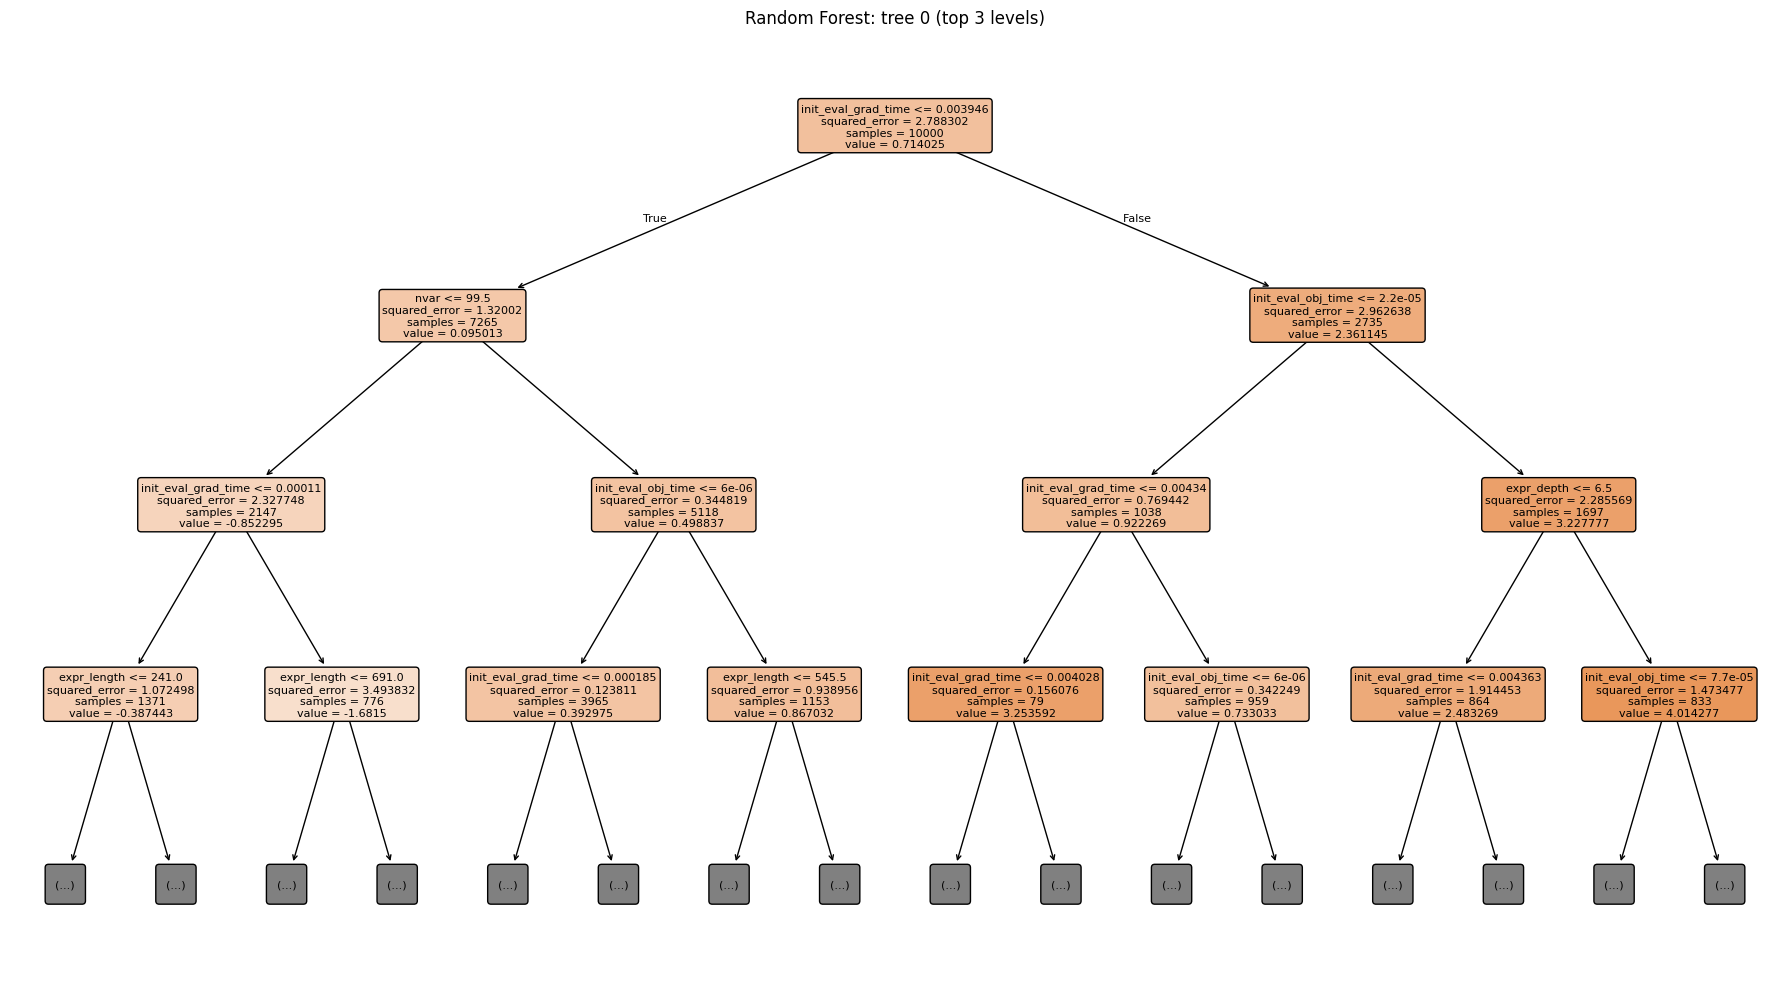

In [103]:
rf_tree0 = final_rf.estimators_[0]
from sklearn import tree

plt.figure(figsize=(18, 10))
tree.plot_tree(
    rf_tree0,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=8,
    precision=6,
)
plt.title("Random Forest: tree 0 (top 3 levels)")
plt.tight_layout()
plt.show()

In [104]:
from sklearn.tree import export_graphviz
import os

dot_data = export_graphviz(
    rf_tree0,
    max_depth=6,
    out_file=None,               # return string instead of writing directly to file
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    precision=6                  # <-- more decimal places
)


PDF written to: ../tree_plots/random_forest.pdf


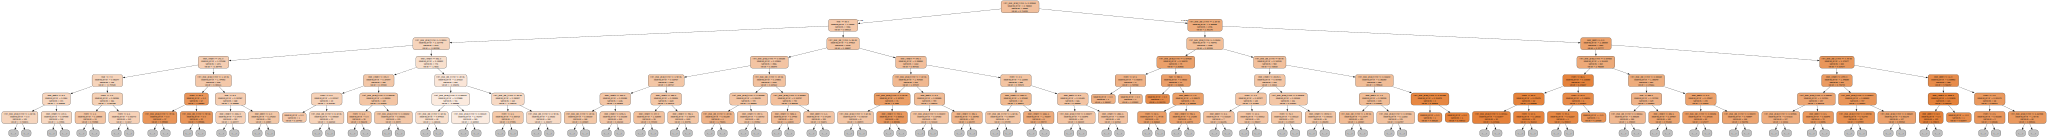

In [105]:
from graphviz import Source

os.makedirs("../tree_plots", exist_ok=True)

tree_graph = Source(dot_data)
pdf_path = tree_graph.render(
    filename="random_forest",    # base name
    directory="../tree_plots",
    format="pdf",
    cleanup=True                     # delete intermediate .dot
)
print("PDF written to:", pdf_path)
tree_graph

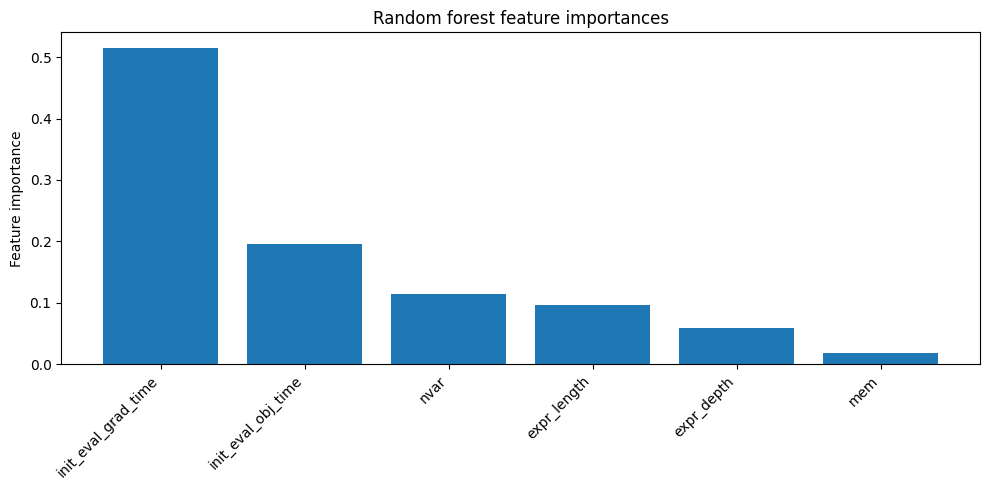

In [106]:
import numpy as np
import matplotlib.pyplot as plt

rf_importances = final_rf.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1]  

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_cols)), rf_importances[indices_rf])
plt.xticks(range(len(feature_cols)), [feature_cols[i] for i in indices_rf], rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.title("Random forest feature importances")
plt.tight_layout()
plt.show()
